In [1]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('gender4.csv', header=0, index_col=0)

In [8]:
data

,count,gender,name,probability,gender_label,no_pic,ethnic_label
0,204,male,Harjinder,0.96,m,NaN,o
1,7383,female,Taylor,0.55,f,NaN,w
2,2274744,male,John,1.00,m,NaN,w
3,766466,male,Andrew,1.00,m,NaN,o
4,571165,female,Stephanie,1.00,f,NaN,w
...,...,...,...,...,...,...,...
1040,745496,female,Michelle,1.00,f,NaN,w
1041,16754,male,Joey,0.87,m,NaN,o
1042,17947,female,Millie,1.00,f,NaN,w
1043,18914,male,Donny,0.99,m,NaN,w


In [11]:
data[data.gender.isnull()]

,count,gender,name,probability,gender_label,no_pic,ethnic_label
182,0,NaN,Vilma-Lotta,0.0,f,NaN,w
217,0,NaN,Tebre'Osha,0.0,f,NaN,o
262,0,NaN,Sealah,0.0,f,NaN,w
426,0,NaN,Neshade,0.0,m,NaN,w
450,0,NaN,Zylina,0.0,f,NaN,o
506,0,NaN,Beveon,0.0,m,NaN,o
522,0,NaN,英一(Eiichi),0.0,m,NaN,o
669,0,NaN,재희(Gabi),0.0,f,NaN,o
882,0,NaN,Sumandhi,0.0,f,NaN,w
959,0,NaN,-SüKii..!,0.0,m,NaN,o


In [37]:
np.average(data.probability)

0.9522276264591439

In [38]:
np.std(data.probability)

0.13793290090176358

In [49]:
np.percentile(data.probability, [10, 15, 20])

array([0.84  , 0.9305, 0.97  ])

In [12]:
data.loc[data.gender_label=='m', 'gender_label_encode'] = 1
data.loc[data.gender_label=='f', 'gender_label_encode'] = 0
data.loc[data.gender=='male', 'gender_encode'] = 1
data.loc[data.gender=='female', 'gender_encode'] = 0
data.loc[data.gender.isnull(), 'gender_encode'] = -1

Accuracy:  0.933852140077821
Confusion matrix:


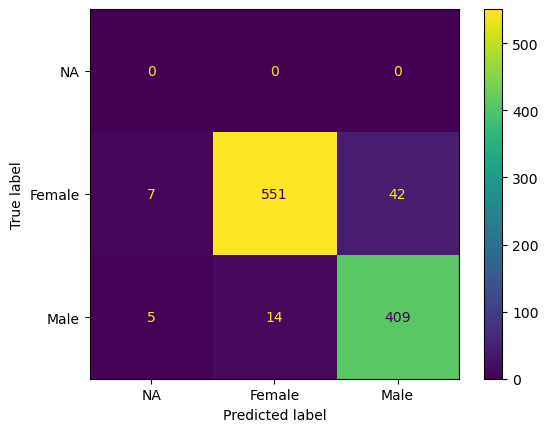

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# acc_genderize = accuracy_score(data['gender_label'], data['gender'])
acc_genderize = np.average(data['gender_label_encode']==data['gender_encode'])
print('Accuracy: ', acc_genderize)
cm_genderize = confusion_matrix(data['gender_label_encode'], data['gender_encode'])
cm_genderize = ConfusionMatrixDisplay(cm_genderize, display_labels=['NA', 'Female', 'Male'])
cm_genderize.plot()
print('Confusion matrix:')
plt.show()

In [27]:
from sklearn.metrics import precision_score, recall_score
print('Precision male: ', precision_score(data['gender_label_encode'], data['gender_encode'], labels=[1], average=None))
print('Precision female: ', precision_score(data['gender_label_encode'], data['gender_encode'], labels=[0], average=None))
print('Recall male: ', recall_score(data['gender_label_encode'], data['gender_encode'], labels=[1], average=None))
print('Recall female: ', recall_score(data['gender_label_encode'], data['gender_encode'], labels=[0], average=None))


Precision male:  [0.90687361]
Precision female:  [0.97522124]
Recall male:  [0.95560748]
Recall female:  [0.91833333]


In [50]:
df_ocv = pd.read_csv('DeepFace_output_opencv.csv', header=0, index_col='index')
df_rf = pd.read_csv('DeepFace_output_retinaface.csv', header=0, index_col='index')
df_dlib = pd.read_csv('DeepFace_output_dlib.csv', header=0, index_col='index')

In [68]:
df_ocv

,Unnamed: 0,gender/Woman,gender/Man,dominant_gender,region/x,region/y,region/w,region/h,race/asian,race/indian,race/black,race/white,race/middle eastern,race/latino hispanic,dominant_race
index,,,,,,,,,,,,,,,
1,0,16.146283,83.853710,Man,55,95,40,40,3.975586e-03,1.038543e+00,2.191151e-03,32.017794,6.398615e+01,2.951352,middle eastern
2,1,0.001790,99.998212,Man,261,187,408,408,1.651727e-09,3.680363e-08,1.751455e-11,99.980527,1.171394e-02,0.007766,white
3,2,0.000022,99.999976,Man,134,155,630,630,9.999958e+01,1.082465e-05,6.742275e-09,0.000162,1.067950e-08,0.000250,asian
4,3,5.760625,94.239378,Man,265,191,405,405,4.399148e+01,3.566110e-01,1.115667e-01,47.257656,2.954409e+00,5.328277,white
7,4,44.916141,55.083859,Man,82,105,105,105,2.502288e+01,1.343634e+01,1.159836e+01,14.619963,1.171872e+01,23.603737,asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,2081,22.440442,77.559561,Man,240,65,194,194,8.046120e+00,1.285608e+01,3.404488e+00,25.740114,2.431465e+01,25.638548,white
3018,2082,99.709439,0.290555,Woman,92,4,294,294,5.018126e+01,2.378337e+00,8.532050e-01,27.419376,5.276755e+00,13.891067,asian
3019,2083,99.996519,0.003481,Woman,111,116,224,224,6.775824e-08,4.633474e-07,3.740969e-10,99.927330,4.799545e-02,0.024676,white


In [83]:
data_ocv = data.join(df_ocv)
data_rf = data.join(df_rf)
data_dlib = data.join(df_dlib)

In [84]:
data_ocv['gender_pred'] = -1
data_ocv.loc[data_ocv['dominant_gender']=='Man', 'gender_pred'] = 1
data_ocv.loc[data_ocv['dominant_gender']=='Man', 'gender_pred'] = 0

data_rf['gender_pred'] = -1
data_rf.loc[data_rf['dominant_gender']=='Man', 'gender_pred'] = 1
data_rf.loc[data_rf['dominant_gender']=='Woman', 'gender_pred'] = 0

data_dlib['gender_pred'] = -1
data_dlib.loc[data_dlib['dominant_gender']=='Man', 'gender_pred'] = 1
data_dlib.loc[data_dlib['dominant_gender']=='Woman', 'gender_pred'] = 0


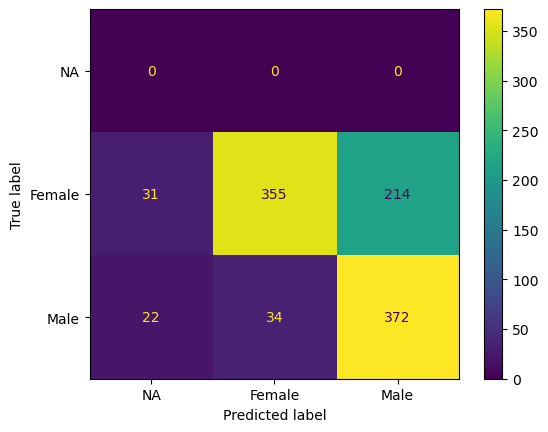

In [80]:
cm_rf_gen = ConfusionMatrixDisplay(confusion_matrix(data_rf['gender_label_encode'], data_rf['gender_pred']), display_labels=['NA', 'Female', 'Male'])
cm_rf_gen.plot()
plt.show()

In [74]:
print('OCV result:')
print('Not detectable: ', np.average(data_ocv['gender_pred']==-1))
print('Accuracy: ', accuracy_score(data_ocv['gender_pred'], data_ocv['gender_label_encode']))

OCV result:
Not detectable:  0.5554474708171206
Accuracy:  0.17023346303501946


In [77]:
np.sum(data_ocv['gender_pred']==-1)

571

In [75]:
print('RF result:')
print('Not detectable: ', np.average(data_rf['gender_pred']==-1))
print('Accuracy: ', accuracy_score(data_rf['gender_pred'], data_rf['gender_label_encode']))

RF result:
Not detectable:  0.05155642023346303
Accuracy:  0.7071984435797666


In [76]:
print('DLIB result:')
print('Not detectable: ', np.average(data_dlib['gender_pred']==-1))
print('Accuracy: ', accuracy_score(data_dlib['gender_pred'], data_dlib['gender_label_encode']))

DLIB result:
Not detectable:  0.1916342412451362
Accuracy:  0.6391050583657587


In [109]:
nameprism = pd.read_csv('NamePrism 0_4247.csv', header=0, index_col='index')
nameprism

,2PRACE,Hispanic,API,Black,AIAN,White
index,,,,,,
0,0.003362,0.008013,0.716182,0.007692,0.001620,0.263132
1,0.000535,0.001814,0.000688,0.091002,0.001826,0.904135
2,0.001614,0.006316,0.094249,0.076954,0.038100,0.782767
3,0.000504,0.011549,0.006773,0.032721,0.008865,0.939589
4,0.000898,0.046264,0.001021,0.018166,0.000542,0.933109
...,...,...,...,...,...,...
4243,0.000915,0.019262,0.051747,0.041826,0.004370,0.881880
4244,0.001670,0.005721,0.014287,0.130680,0.001526,0.846116
4245,0.000203,0.001227,0.000722,0.005866,0.000459,0.991522


In [110]:
nameprism['pred_race'] = nameprism.idxmax(axis=1)
nameprism['pred_race_encode'] = 0
nameprism.loc[nameprism.pred_race=='White', 'pred_race_encode'] = 1
nameprism

,2PRACE,Hispanic,API,Black,AIAN,White,pred_race,pred_race_encode
index,,,,,,,,
0,0.003362,0.008013,0.716182,0.007692,0.001620,0.263132,API,0
1,0.000535,0.001814,0.000688,0.091002,0.001826,0.904135,White,1
2,0.001614,0.006316,0.094249,0.076954,0.038100,0.782767,White,1
3,0.000504,0.011549,0.006773,0.032721,0.008865,0.939589,White,1
4,0.000898,0.046264,0.001021,0.018166,0.000542,0.933109,White,1
...,...,...,...,...,...,...,...,...
4243,0.000915,0.019262,0.051747,0.041826,0.004370,0.881880,White,1
4244,0.001670,0.005721,0.014287,0.130680,0.001526,0.846116,White,1
4245,0.000203,0.001227,0.000722,0.005866,0.000459,0.991522,White,1


In [119]:
data['ethnic_label_encode'] = -1
data.loc[data['ethnic_label']=='w', 'ethnic_label_encode'] = 1
data.loc[data['ethnic_label']=='o', 'ethnic_label_encode'] = 0
data = data[data['ethnic_label']!='na']

In [120]:
data_nameprism = data.join(nameprism)
data_nameprism

,count,gender,name,probability,gender_label,no_pic,ethnic_label,gender_label_encode,gender_encode,ethnic_label_encode,2PRACE,Hispanic,API,Black,AIAN,White,pred_race,pred_race_encode
0,204,male,Harjinder,0.96,m,NaN,o,1.0,1.0,0,0.003362,0.008013,0.716182,0.007692,0.001620,0.263132,API,0
1,7383,female,Taylor,0.55,f,NaN,w,0.0,0.0,1,0.000535,0.001814,0.000688,0.091002,0.001826,0.904135,White,1
2,2274744,male,John,1.00,m,NaN,w,1.0,1.0,1,0.001614,0.006316,0.094249,0.076954,0.038100,0.782767,White,1
3,766466,male,Andrew,1.00,m,NaN,o,1.0,1.0,0,0.000504,0.011549,0.006773,0.032721,0.008865,0.939589,White,1
4,571165,female,Stephanie,1.00,f,NaN,w,0.0,0.0,1,0.000898,0.046264,0.001021,0.018166,0.000542,0.933109,White,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,745496,female,Michelle,1.00,f,NaN,w,0.0,0.0,1,0.002438,0.049983,0.007953,0.102290,0.005571,0.831766,White,1
1041,16754,male,Joey,0.87,m,NaN,o,1.0,1.0,0,0.001566,0.085377,0.036064,0.029691,0.146942,0.700359,White,1
1042,17947,female,Millie,1.00,f,NaN,w,0.0,0.0,1,0.000240,0.024133,0.004144,0.057521,0.001791,0.912171,White,1
1043,18914,male,Donny,0.99,m,NaN,w,1.0,1.0,1,0.000008,0.001216,0.128988,0.098815,0.000024,0.770949,White,1


In [122]:
print('Accuracy NamePrism: ', accuracy_score(data_nameprism['ethnic_label_encode'], data_nameprism['pred_race_encode']))

Accuracy NamePrism:  0.7135523613963038


In [129]:
from sklearn.metrics import f1_score
print('F1 score: ', f1_score(data_nameprism['ethnic_label_encode'], data_nameprism['pred_race_encode'], average='macro'))

F1 score:  0.5698227184438355


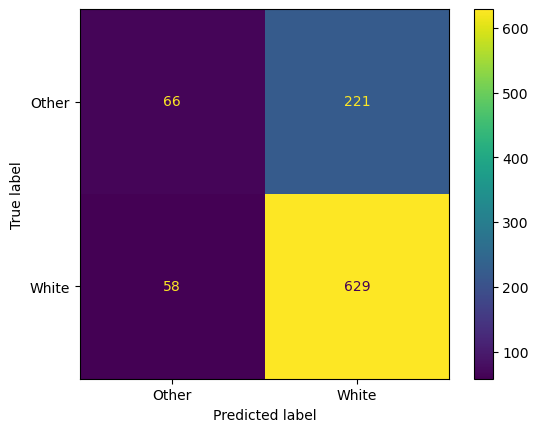

In [124]:
cm_np = ConfusionMatrixDisplay(confusion_matrix(data_nameprism['ethnic_label_encode'], data_nameprism['pred_race_encode']), display_labels=['Other', 'White'])
cm_np.plot()
plt.show()

In [ ]:
data_ocv = data.join(df_ocv)
data_rf = data.join(df_rf)
data_dlib = data.join(df_dlib)

In [85]:
data_ocv = data_ocv[data_ocv.ethnic_label!='na']
data_rf = data_rf[data_rf.ethnic_label!='na']
data_dlib = data_dlib[data_dlib.ethnic_label!='na']

data_ocv.shape

(974, 25)

Not detectable:  0.26591375770020537
Accuracy ethinicity prediction:  0.5831622176591376


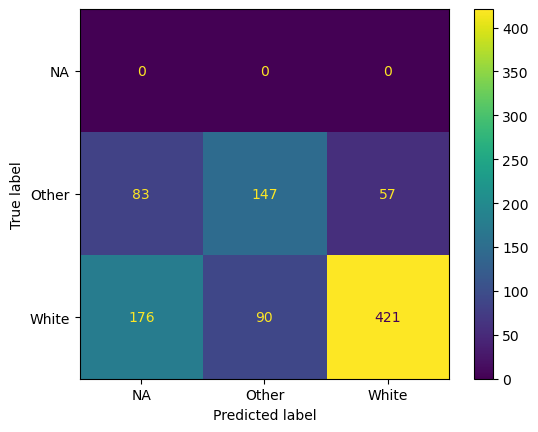

In [134]:
data_ocv['dominant_race_encode'] = 0
data_ocv.loc[data_ocv['dominant_race']=='white', 'dominant_race_encode'] = 1
data_ocv.loc[data_ocv['dominant_race'].isnull(), 'dominant_race_encode'] = -1
print('Not detectable: ', np.sum(data_ocv['dominant_race_encode']==-1)/974)
data_ocv['ethnic_label_encode'] = 0
data_ocv.loc[data_ocv['ethnic_label']=='w', 'ethnic_label_encode'] = 1
print('Accuracy ethinicity prediction: ', accuracy_score(data_ocv['ethnic_label_encode'], data_ocv['dominant_race_encode']))
cm_ethnicity_ocv = confusion_matrix(data_ocv['ethnic_label_encode'], data_ocv['dominant_race_encode'])
cm_ethnicity_ocv = ConfusionMatrixDisplay(cm_ethnicity_ocv, display_labels=['NA', 'Other', 'White'])
cm_ethnicity_ocv.plot()
plt.show()

Not detectable:  0.015400410677618069
Accuracy ethinicity prediction:  0.8028747433264887


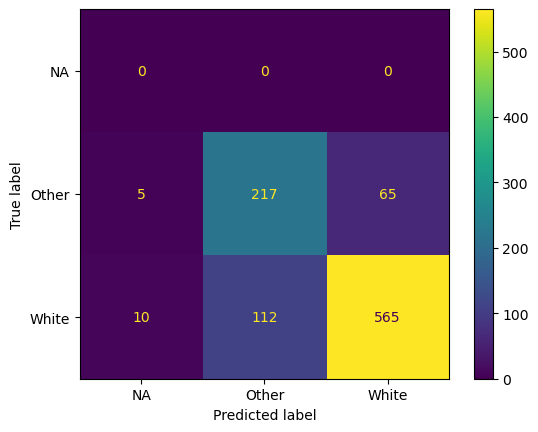

In [135]:
data_rf['dominant_race_encode'] = 0
data_rf.loc[data_rf['dominant_race']=='white', 'dominant_race_encode'] = 1
data_rf.loc[data_rf['dominant_race'].isnull(), 'dominant_race_encode'] = -1
print('Not detectable: ', np.sum(data_rf['dominant_race_encode']==-1)/974)
data_rf['ethnic_label_encode'] = 0
data_rf.loc[data_rf['ethnic_label']=='w', 'ethnic_label_encode'] = 1
print('Accuracy ethinicity prediction: ', accuracy_score(data_rf['ethnic_label_encode'], data_rf['dominant_race_encode']))
cm_ethnicity_rf = confusion_matrix(data_rf['ethnic_label_encode'], data_rf['dominant_race_encode'])
cm_ethnicity_rf = ConfusionMatrixDisplay(cm_ethnicity_rf, display_labels=['NA', 'Other', 'White'])
cm_ethnicity_rf.plot()
plt.show()

Not detectable:  0.15092402464065707
Accuracy ethinicity prediction:  0.7176591375770021


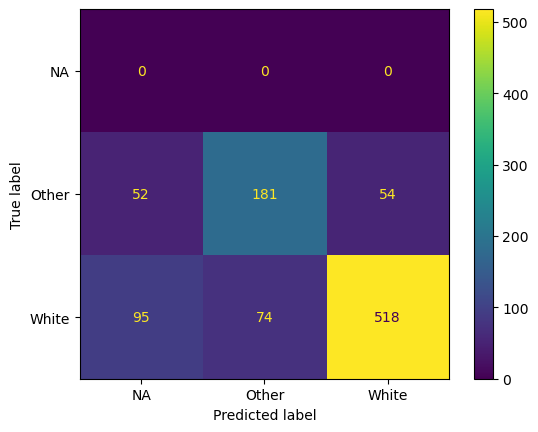

In [136]:
data_dlib['dominant_race_encode'] = 0
data_dlib.loc[data_dlib['dominant_race']=='white', 'dominant_race_encode'] = 1
data_dlib.loc[data_dlib['dominant_race'].isnull(), 'dominant_race_encode'] = -1
print('Not detectable: ', np.sum(data_dlib['dominant_race_encode']==-1)/974)
data_dlib['ethnic_label_encode'] = 0
data_dlib.loc[data_dlib['ethnic_label']=='w', 'ethnic_label_encode'] = 1
print('Accuracy ethinicity prediction: ', accuracy_score(data_dlib['ethnic_label_encode'], data_dlib['dominant_race_encode']))
cm_ethnicity_dlib = confusion_matrix(data_dlib['ethnic_label_encode'], data_dlib['dominant_race_encode'])
cm_ethnicity_dlib = ConfusionMatrixDisplay(cm_ethnicity_dlib, display_labels=['NA', 'Other', 'White'])
cm_ethnicity_dlib.plot()
plt.show()